# Модель машинного обучения для детекции и предотвращения мошенничества в кредитных операциях

**Автор: Кузьмин Дмитрий**

## Этапы работы

1. Сбор и предварительная обработка данных
2. Предварительный анализ и масштабирование признаков
3. Обучение модели и выбор алгоритма
4. Оценка результатов

## О наборе данных

Используемый набор данных содержит транзакции по кредитным картам, совершённые в сентябре 2013 года европейскими держателями карт. Все входные признаки - числовые, являющиеся результатом преобразования главных компонент (PCA), что уменьшает размерность и убирает корреляции.

В наборе 31 числовая переменная, а также следующие важные признаки:

- Time - количество секунд, прошедших с момента первой транзакции в датасете до текущей транзакции. Этот признак помогает учитывать временную динамику транзакций.

- Amount - сумма транзакции, которая может влиять на вероятность мошенничества и использоваться для оценки экономической значимости.

- Class - целевая переменная, которая принимает значение 1 для мошеннических транзакций и 0 для легитимных.

Набор данных сильно несбалансирован: мошенничество составляет лишь 0.172% от всех транзакций (492 мошеннических из 284 807). Из-за отсутствия идентификатора владельца карты каждая транзакция рассматривается как независимый случай.

Для решения этой проблемы при обучении моделей применяется балансировка данных через создание подвыборок с равным соотношением мошеннических и нормальных транзакций - по 50% каждого класса, что позволяет модели лучше распознавать редкие мошеннические случаи и уменьшает риск смещения.

## Технический стек

| Компоненты | Технологии |
|-----------|-----------|
| Язык программирования | Python 3.13 |
| ML Библиоека | scikit-learn 1.6.1 |
| Обработка данных | pandas, numpy |
| Визуализация | matplotlib, seaborn |
| Модели ML | Logistic Regression, Random Forest, Gradient Boosting |

---

## Импорт библиотек

In [1]:
import warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split, StratifiedKFold

## Чтение данных

In [2]:
df = pd.read_csv('../data/creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Предварительная очистка данных

### Пропущенные значения

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Ура, в нашем наборе нету пропущенных значений

### Дисбаланс классов

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Количество')

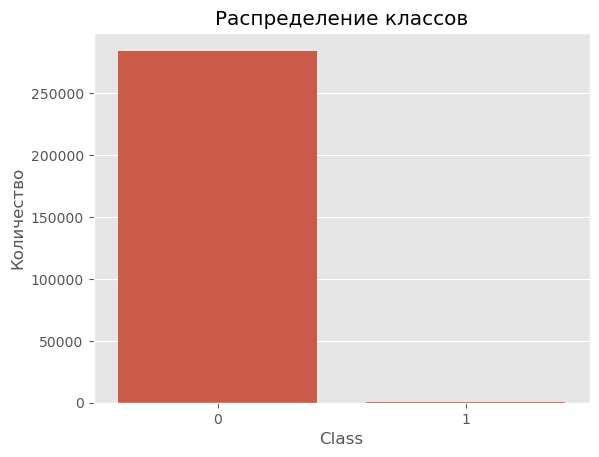

In [7]:
sns.countplot(data=df, x='Class')
plt.title('Распределение классов')
plt.xlabel('Class')
plt.ylabel('Количество')

### Выбросы

В задачах, подобных обнаружению мошенничества, выбросы часто и есть тот самый миноритарный класс, который мы хотим найти. Если мы будем относиться к выбросам без должной осторожности, то рискуем потерять важные данные для обучения нашей модели. Например, при удалении мошеннических транзакций на большую сумму наша модель перестает понимать, что мошенники способны переводить крупные суммы со счетов, то есть мы теряем тех самых "китов"

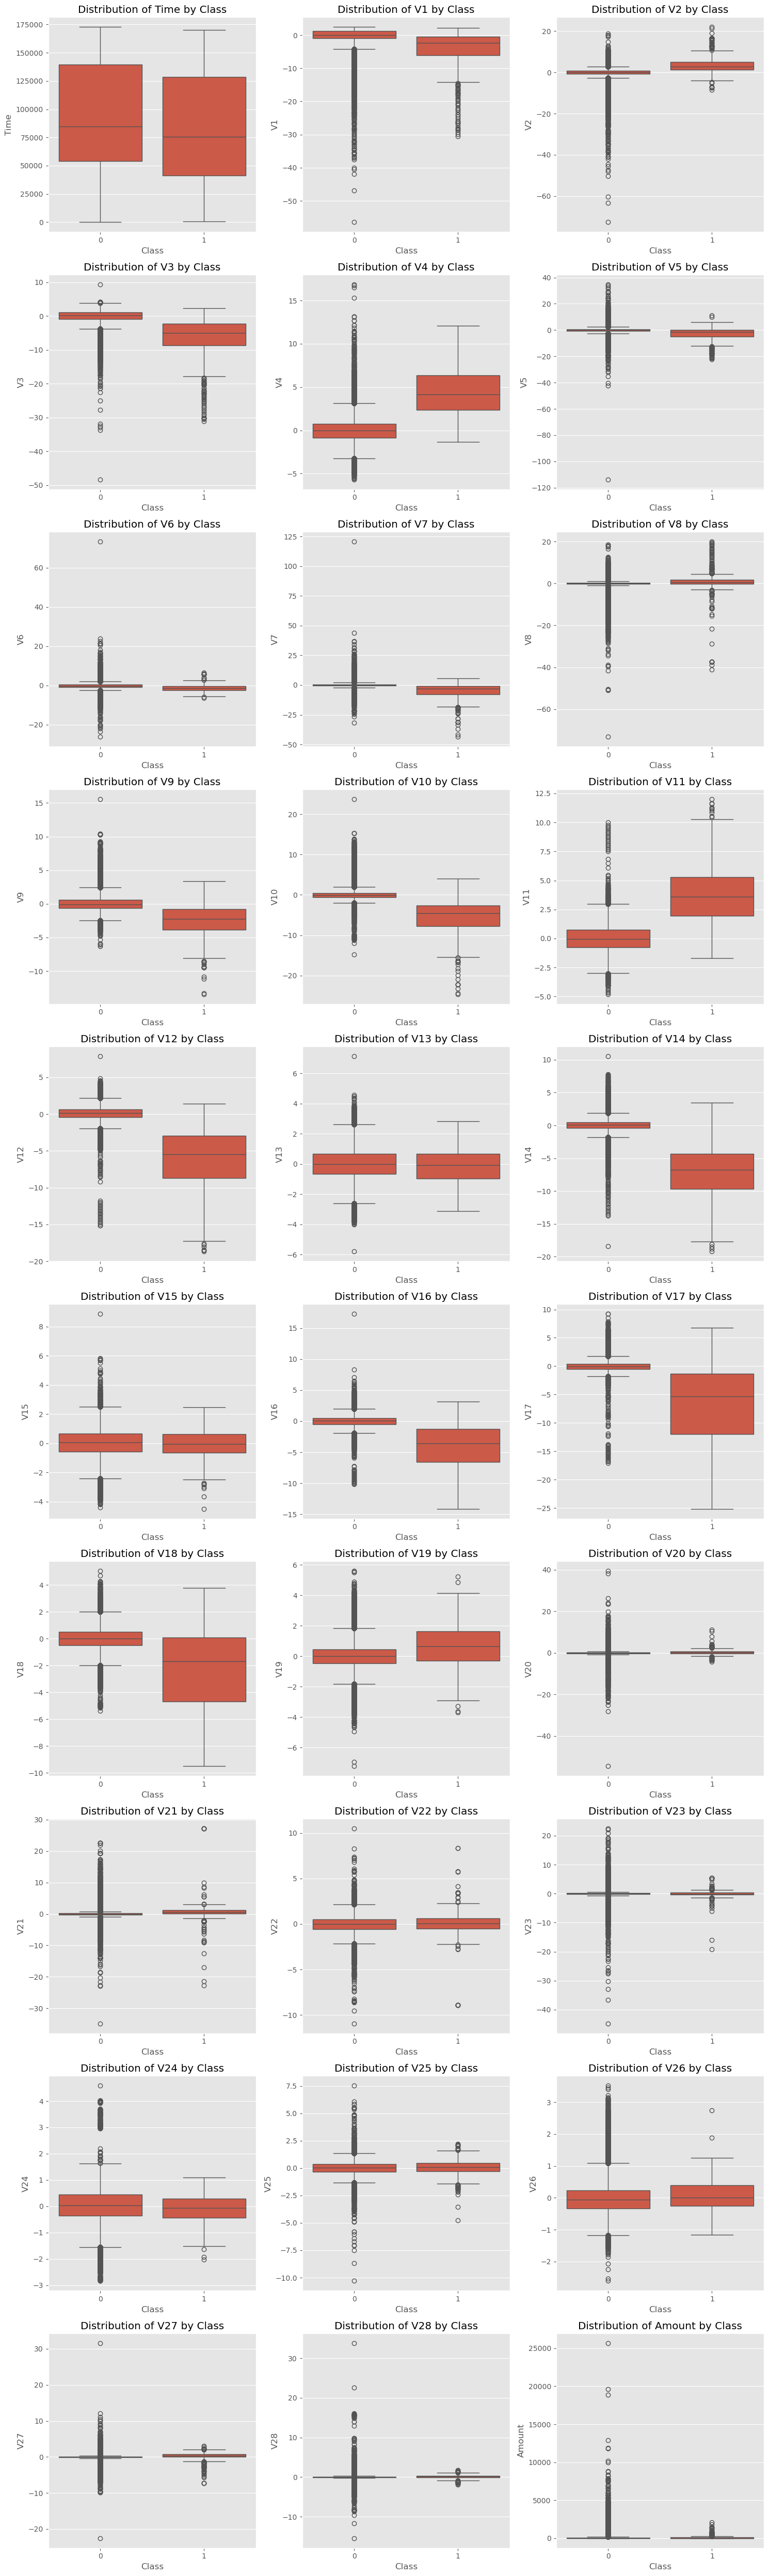

In [8]:
df_num = df.select_dtypes(exclude='object')
features = [col for col in df_num.columns if col != 'Class']

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.ravel() if n_rows > 1 else [axes]

for i, feature in enumerate(features):
    sns.boxplot(data=df_num, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Class')
    
for i in range(len(features), len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()

In [9]:
def find_outliers(df):
    outliers = []
    for col in df.select_dtypes(include=np.number):
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outliers.extend(df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)].index)
    return list(set(outliers))

In [10]:
outliers = find_outliers(df)
print(f"Количество выбросов: {len(outliers)}")
print(f"Процент выбросов от набора данных: {round(len(outliers)/len(df) * 100, 1)}%")

Количество выбросов: 138488
Процент выбросов от набора данных: 48.6%


## Оценка корреляций признаков с целевой переменной

In [11]:
df.corr()["Class"].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

<Axes: title={'center': 'Наиболее значимые признаки'}>

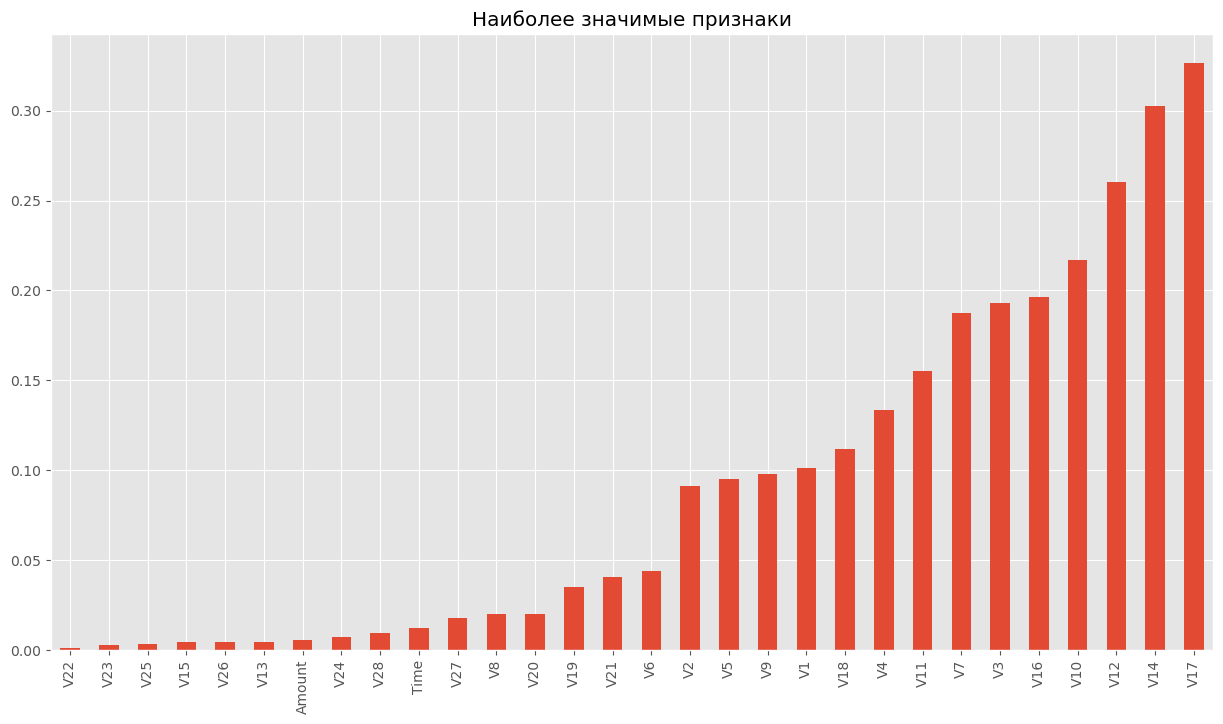

In [12]:
plt.figure(figsize=(15,8))
df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Наиболее значимые признаки')

In [13]:
print(f" Наиболее значимые признаки в датасете: {list(df.corr()['Class'][df.corr()['Class'] < -0.15].index)}")

 Наиболее значимые признаки в датасете: ['V3', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17']


## Визуализация данных

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

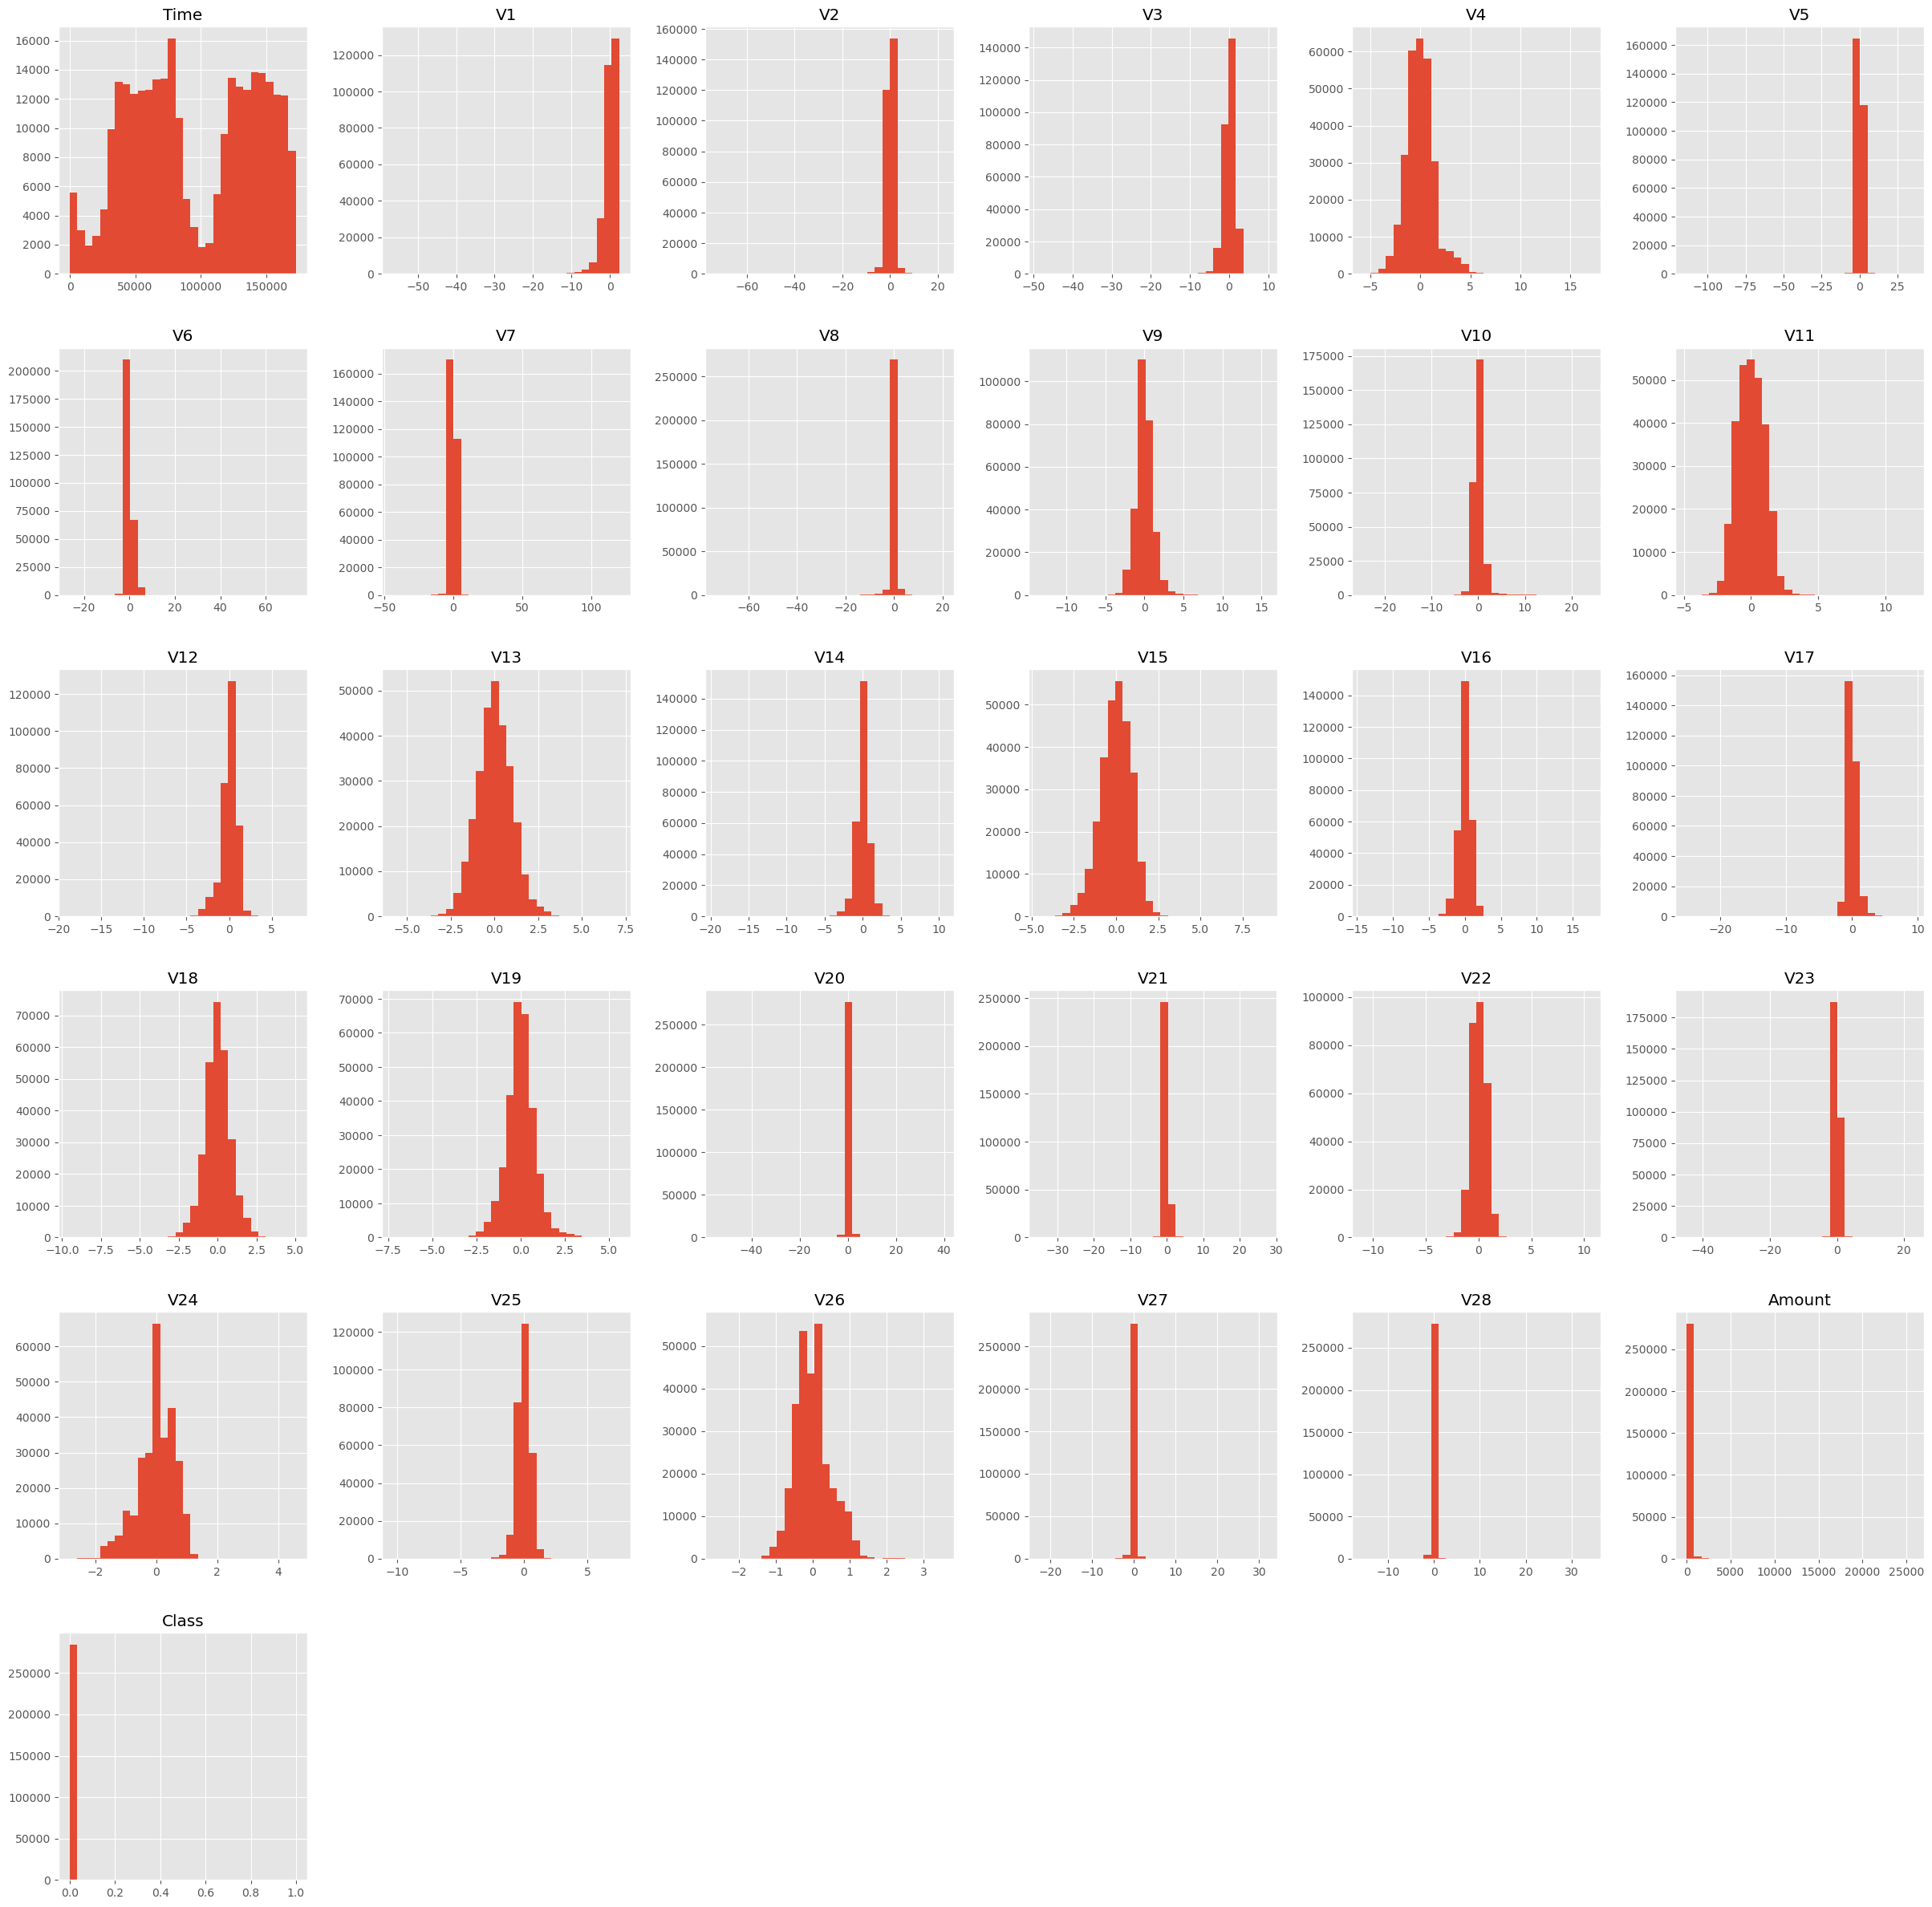

In [14]:
df.hist(bins=30, figsize=(30,30))

Text(0, 0.5, 'Частота')

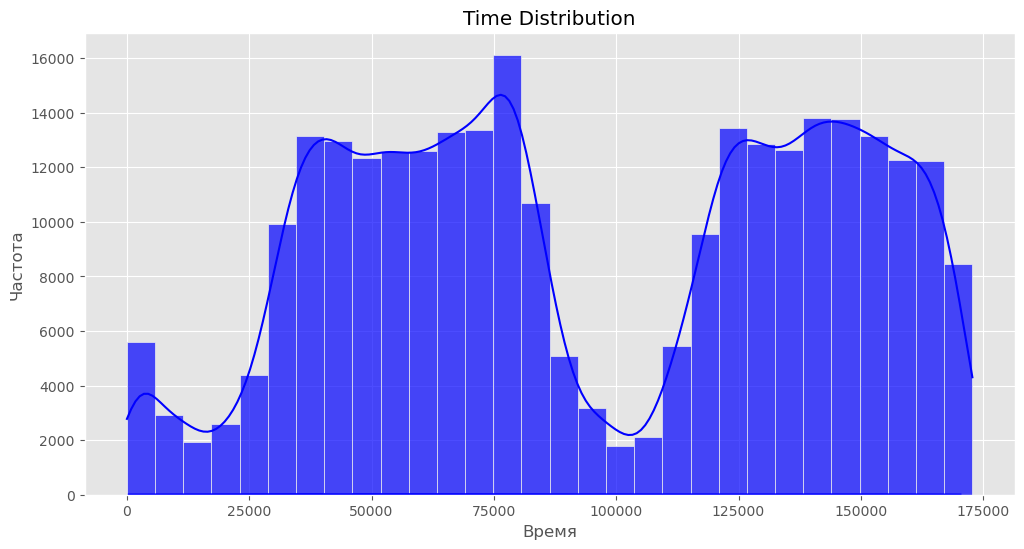

In [15]:
plt.figure(figsize=(12, 6))

class_0 = df[df['Class'] == 0]['Time']
class_1 = df[df['Class'] == 1]['Time']


sns.histplot(class_0, bins=30, alpha=0.7, kde=True, color='blue')
plt.title('Time Distribution')
plt.xlabel('Время')
plt.ylabel('Частота')

sns.histplot(class_1, bins=30, alpha=0.7, kde=True, color='blue')
plt.title('Time Distribution')
plt.xlabel('Время')
plt.ylabel('Частота')

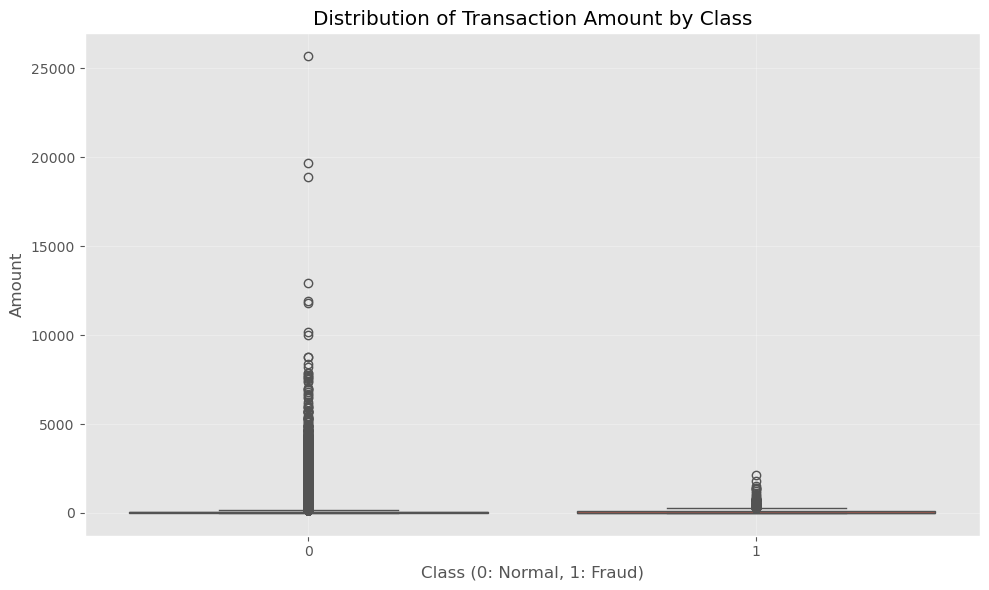

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Amount')
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Разбиение набора на тренировчную и тестовую выборку

In [17]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set size: 227845
Test set size: 56962

Training set class distribution:
Class
0    227451
1       394
Name: count, dtype: int64

Test set class distribution:
Class
0    56864
1       98
Name: count, dtype: int64


## Экспорт тренировочной и тестовой выборки

In [18]:
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)